In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import warnings
warnings.filterwarnings('ignore')


In [107]:
st = pd.read_csv("C:\\Users\\Vikas\\OneDrive\\Desktop\\DataSets\\EDA_Shark_Tank_India.xlsx - Sheet1.csv")
st.head(5)


,episode_number,pitch_number,brand_name,idea,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,deal_valuation,ashneer_present,anupam_present,aman_present,namita_present,vineeta_present,peyush_present,ghazal_present,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
0,1,1,BluePine Industries,Frozen Momos,1,50.0,5.0,1000.00,75.0,16.00,468.75,1,1,1,1,1,0,0,1,0,1,0,1,0,0,3,25.0,5.333333
1,1,2,Booz scooters,Renting e-bike for mobility in private spaces,1,40.0,15.0,266.67,40.0,50.00,80.00,1,1,1,1,1,0,0,1,0,0,0,1,0,0,2,20.0,25.000000
2,1,3,Heart up my Sleeves,Detachable Sleeves,1,25.0,10.0,250.00,25.0,30.00,83.33,1,1,1,1,1,0,0,0,1,0,0,1,0,0,2,12.5,15.000000
3,2,4,Tagz Foods,Healthy Potato Chips,1,70.0,1.0,7000.00,70.0,2.75,2545.45,1,1,1,1,1,0,0,1,0,0,0,0,0,0,1,70.0,2.750000
4,2,5,Head and Heart,Brain Development Course,0,50.0,5.0,1000.00,0.0,0.00,0.00,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0.0,0.000000


In [11]:
st.isnull().sum()

episode_number           0
pitch_number             0
brand_name               0
idea                     0
deal                     0
pitcher_ask_amount       0
ask_equity               0
ask_valuation            0
deal_amount              0
deal_equity              0
deal_valuation           0
ashneer_present          0
anupam_present           0
aman_present             0
namita_present           0
vineeta_present          0
peyush_present           0
ghazal_present           0
ashneer_deal             0
anupam_deal              0
aman_deal                0
namita_deal              0
vineeta_deal             0
peyush_deal              0
ghazal_deal              0
total_sharks_invested    0
amount_per_shark         0
equity_per_shark         0
dtype: int64

In [73]:
#what is data type
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   episode_number         117 non-null    int64  
 1   pitch_number           117 non-null    int64  
 2   brand_name             117 non-null    object 
 3   idea                   117 non-null    object 
 4   deal                   117 non-null    int64  
 5   pitcher_ask_amount     117 non-null    float64
 6   ask_equity             117 non-null    float64
 7   ask_valuation          117 non-null    float64
 8   deal_amount            117 non-null    float64
 9   deal_equity            117 non-null    float64
 10  deal_valuation         117 non-null    float64
 11  ashneer_present        117 non-null    int64  
 12  anupam_present         117 non-null    int64  
 13  aman_present           117 non-null    int64  
 14  namita_present         117 non-null    int64  
 15  vineet

In [17]:
st.duplicated().sum()

0

In [24]:
##Q1. Find the number of episodes?
st["episode_number"]

0       1
1       1
2       1
3       2
4       2
       ..
112    34
113    34
114    35
115    35
116    35
Name: episode_number, Length: 117, dtype: int64

In [25]:
st["episode_number"].nunique()

35

In [26]:
st["episode_number"].max()

35

In [30]:
#Q2. Max, min , mean of asked amount,asked equity, asked valuation?
st.describe()

,episode_number,pitch_number,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,deal_valuation,ashneer_present,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,...,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,18.735043,59.000000,0.555556,319.854709,5.188034,3852.462479,31.982915,8.963504,467.104872,0.837607,...,0.179487,0.205128,0.239316,0.188034,0.128205,0.230769,0.059829,1.230769,18.132481,5.583590
std,10.070778,33.919021,0.499041,2767.842777,3.892121,11931.601957,36.687391,13.106769,919.988864,0.370397,...,0.385410,0.405532,0.428501,0.392420,0.335756,0.423137,0.238190,1.410457,23.588682,10.803799
min,1.000000,1.000000,0.000000,0.001010,0.250000,0.010000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,30.000000,0.000000,45.000000,2.500000,666.670000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.000000,59.000000,1.000000,50.000000,5.000000,1250.000000,25.000000,3.000000,100.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,1.250000
75%,27.000000,88.000000,1.000000,80.000000,7.500000,2857.140000,50.000000,15.000000,500.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,25.000000,6.000000
max,35.000000,117.000000,1.000000,30000.000000,25.000000,120000.000000,150.000000,75.000000,6666.670000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,100.000000,75.000000


In [5]:
#st["pitcher_ask_amount"].max()
st["pitcher_ask_amount"].max()

30000.0

In [39]:
st["ask_equity"].max()


25.0

In [40]:
st["ask_valuation"].max()

120000.0

In [41]:
st["pitcher_ask_amount"].min()



0.00101

In [42]:
st["ask_equity"].min()

0.25

In [43]:
st["ask_valuation"].min()

0.01

In [44]:
a = st["pitcher_ask_amount"].mean()
print(a)
b = st["ask_equity"].mean()
print(b)
c = st["ask_valuation"].mean()
print(c)


319.8547094871795
5.188034188034188
3852.4624786324785


In [51]:

st[['pitcher_ask_amount', 'ask_equity', 'ask_valuation']].agg(['max','mean','min']).T

,max,mean,min
pitcher_ask_amount,30000.0,319.854709,0.00101
ask_equity,25.0,5.188034,0.25000
ask_valuation,120000.0,3852.462479,0.01000


In [72]:
#Max & Min asked- equity,asked-valuation and asked amount episode-wise?
st.groupby("episode_number")[['pitcher_ask_amount', 'ask_equity', 'ask_valuation']].agg(['max','min']).reset_index()
#st[['pitcher_ask_amount', 'ask_equity', 'ask_valuation']].agg(['max','mean','min']).T



episode_number pitcher_ask_amount           ask_equity       ask_valuation  \
                                 max       min        max   min           max   
0               1               50.0  25.00000       15.0  5.00       1000.00   
1               2               70.0  50.00000        5.0  1.00       7000.00   
2               3              100.0  50.00000        4.0  0.25      40000.00   
3               4               75.0  50.00000       10.0  4.00       1875.00   
4               5              100.0  10.00000       20.0  1.00      10000.00   
5               6              100.0  45.00000       10.0  1.00      10000.00   
6               7              100.0  50.00000        7.5  1.00       7500.00   
7               8               56.0  30.00000        7.5  2.50       2000.00   
8               9              100.0  50.00000        5.0  2.50       2000.00   
9              10               30.0  25.00000        5.0  2.00       1500.00   
10             11            30000.0  30.00000       25.0  5.00     120000.00   
11             12               75.0  40.00000        5.0  3.00       1875.00   
12             13               50.0  30.00000       10.0  2.00       2500.00   
13             14              100.0  45.00000        5.0  3.00       3333.33   
14             15               50.0   5.00000        5.0  3.00       1250.00   
15             16               80.0  45.00000        7.0  2.00       2250.00   
16             17              150.0  50.00000       10.0  3.00       5000.00   
17             18              100.0  50.00000        4.0  1.00      10000.00   
18             19              125.0  15.00000        8.0  1.25      10000.00   
19             20               65.0  35.00000        5.0  2.00       3250.00   
20             21              100.0  35.00000       10.0  5.00       1250.00   
21             22               80.0  50.00000        5.0  2.00       3000.00   
22             23              100.0  30.00000        5.0  1.00      10000.00   
23             24               40.0  20.00000       10.0  8.00        500.00   
24             25              150.0  50.00000        4.0  2.00       7500.00   
25             26               65.0  50.00000       10.0  1.00       6500.00   
26             27              100.0   0.00101       10.0  1.00      10000.00   
27             28               90.0  50.00000        5.0  4.00       1875.00   
28             29              100.0  75.00000        5.0  3.00       2857.14   
29             30              300.0  50.00000       15.0  1.00      30000.00   
30             31               75.0  50.00000       10.0  2.00       3750.00   
31             32              200.0  35.00000        7.0  1.00       5000.00   
32             33               40.0  35.00000       10.0  1.00       3500.00   
33             34              100.0  30.00000       10.0  1.00      10000.00   
34             35              100.0  40.00000        8.0  2.50       4000.00   

             
        min  
0    250.00  
1   1000.00  
2   1875.00  
3    500.00  
4     50.00  
5    500.00  
6    666.67  
7    746.67  
8   1000.00  
9    500.00  
10   300.00  
11   800.00  
12   500.00  
13   900.00  
14   100.00  
15  1071.43  
16   500.00  
17  1250.00  
18   300.00  
19   700.00  
20   470.00  
21  1500.00  
22   600.00  
23   200.00  
24  1250.00  
25   500.00  
26     0.01  
27  1000.00  
28  1500.00  
29   500.00  
30   500.00  
31   583.33  
32   400.00  
33   400.00  
34   500.00

In [73]:
st.head(3)

,episode_number,pitch_number,brand_name,idea,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
0,1,1,BluePine Industries,Frozen Momos,1,50.0,5.0,1000.00,75.0,16.0,...,1,0,1,0,1,0,0,3,25.0,5.333333
1,1,2,Booz scooters,Renting e-bike for mobility in private spaces,1,40.0,15.0,266.67,40.0,50.0,...,1,0,0,0,1,0,0,2,20.0,25.000000
2,1,3,Heart up my Sleeves,Detachable Sleeves,1,25.0,10.0,250.00,25.0,30.0,...,0,1,0,0,1,0,0,2,12.5,15.000000


In [ ]:
#Q4. Brand names in which 2 ,3 or 4 sharks are invested?

In [76]:
st["total_sharks_invested"].values

array([3, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2, 2, 0, 0, 5, 1, 0, 2, 0, 0, 2,
       2, 1, 2, 2, 0, 3, 3, 3, 0, 1, 2, 1, 0, 3, 3, 2, 4, 2, 0, 0, 1, 1,
       3, 2, 0, 2, 2, 5, 3, 0, 1, 0, 0, 1, 0, 0, 4, 0, 0, 1, 0, 5, 3, 1,
       2, 3, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 5, 0, 1, 0, 1, 0, 4, 0, 1,
       3, 0, 3, 3, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 3, 2,
       4, 0, 0, 0, 4, 0, 0], dtype=int64)

In [80]:
st[(st["total_sharks_invested"]>=2) & (st["total_sharks_invested"]<=4)][['brand_name']]

,brand_name
0,BluePine Industries
1,Booz scooters
2,Heart up my Sleeves
9,Cosiq
11,Bummer
12,Revamp Moto
18,Raising Superstars
21,Beyond Snack
22,Vivalyf Innovations- Easy Life
24,Altor


In [8]:
#Q5. Episode wise minimum and maximum of sharks invested?

#st[(st["total_sharks_invested"].min()) & (st["total_sharks_invested"].max())]['episode_number']
st.groupby('episode_number')[["total_sharks_invested"]].agg(['min','max'])

total_sharks_invested    
                                 min max
episode_number                          
1                                  2   3
2                                  0   1
3                                  0   1
4                                  0   2
5                                  0   2
6                                  0   5
7                                  0   2
8                                  1   2
9                                  0   2
10                                 3   3
11                                 0   2
12                                 0   3
13                                 2   4
14                                 0   2
15                                 1   3
16                                 0   2
17                                 0   5
18                                 0   1
19                                 0   4
20                                 0   5
21                                 1   3
22                                 0   3
23                                 0   1
24                                 0   2
25                                 0   5
26                                 0   1
27                                 0   4
28                                 0   3
29                                 0   3
30                                 0   2
31                                 0   1
32                                 0   1
33                                 0   3
34                                 0   4
35                                 0   4

In [94]:
#Q5. Episode wise minimum and maximum of sharks invested?
st.groupby('episode_number')[['total_sharks_invested','deal_amount']].agg(['min','max'])

total_sharks_invested     deal_amount       
                                 min max         min    max
episode_number                                             
1                                  2   3    25.00000   75.0
2                                  0   1     0.00000   70.0
3                                  0   1     0.00000   75.0
4                                  0   2     0.00000   75.0
5                                  0   2     0.00000  100.0
6                                  0   5     0.00000  100.0
7                                  0   2     0.00000  100.0
8                                  1   2    30.00000   56.0
9                                  0   2     0.00000   50.0
10                                 3   3    25.00000   30.0
11                                 0   2     0.00000   50.0
12                                 0   3     0.00000   75.0
13                                 2   4    50.00000  105.0
14                                 0   2     0.00000  100.0
15                                 1   3     0.00005  100.0
16                                 0   2     0.00000   75.0
17                                 0   5     0.00000  150.0
18                                 0   1     0.00000    1.0
19                                 0   4     0.00000   60.0
20                                 0   5     0.00000  100.0
21                                 1   3    25.00000  100.0
22                                 0   3     0.00000   60.0
23                                 0   1     0.00000   50.0
24                                 0   2     0.00000   50.0
25                                 0   5     0.00000  100.0
26                                 0   1     0.00000   65.0
27                                 0   4     0.00000  100.0
28                                 0   3     0.00000  100.0
29                                 0   3     0.00000   75.0
30                                 0   2     0.00000   80.0
31                                 0   1     0.00000   75.0
32                                 0   1     0.00000   50.0
33                                 0   3     0.00000   60.0
34                                 0   4     0.00000   40.0
35                                 0   4     0.00000   40.0

In [97]:
#Q6. Minimum and Maximum sharks invested in each brand? 
st.groupby('brand_name')[['total_sharks_invested']].agg(['min','max'])

total_sharks_invested    
                                                 min max
brand_name                                              
ARRCOAT Surface Textures                           1   1
Aas Vidyalaya                                      3   3
Agro tourism                                       0   0
Aliste Technologies                                0   0
Alpino                                             0   0
...                                              ...  ..
Vivalyf Innovations- Easy Life                     2   2
Wakao Foods                                        3   3
Watt Technovations                                 4   4
WeSTOCK                                            4   4
Woloo                                              0   0

[117 rows x 2 columns]

In [115]:
#Q7. Brand names who ask for 1 crore and got a deal?

st[(st['pitcher_ask_amount']>=100) & (st['deal']>=1)][['brand_name',"deal_amount"]]



,brand_name,deal_amount
12,Revamp Moto,100.0
39,The Renal Project,100.0
50,Aas Vidyalaya,150.0
55,Otua,1.0
64,Get a Whey,100.0
71,Namhya Foods,50.0
79,Sunfox Technologies,100.0
87,Insurance Samadhan,100.0


In [118]:
#Q8. Brand names where deal equity is between 0 to 50? 
st[(st['deal_equity']>=0) & (st['deal_equity']<=50)][['brand_name','deal_equity']]

,brand_name,deal_equity
0,BluePine Industries,16.00
1,Booz scooters,50.00
2,Heart up my Sleeves,30.00
3,Tagz Foods,2.75
4,Head and Heart,0.00
...,...,...
112,Green Protein,0.00
113,On2Cook,0.00
114,Jain Shikanji,30.00
115,Woloo,0.00


In [77]:
# Q9. Find the number of brands participated in each episode?
#st.head(3)
st.groupby('episode_number')[['brand_name']].count()

,brand_name
episode_number,
1,3
2,3
3,3
4,3
5,3
6,3
7,3
8,3
9,3


In [130]:
#Q10. How many sharks participated in this show and What were their names? 
sharks = []
for i in st.columns:
    if 'present' in i:
        i.split("_")[0]
        sharks.append(i)
print("No of sharks", len(sharks))
print("Name the sharks",sharks)
        

No of sharks 7
Name the sharks ['ashneer_present', 'anupam_present', 'aman_present', 'namita_present', 'vineeta_present', 'peyush_present', 'ghazal_present']


In [132]:
#Q11. Find appearance of each sharks? 
a = st[['ashneer_present','anupam_present','aman_present','namita_present','vineeta_present','peyush_present','ghazal_present']].sum()


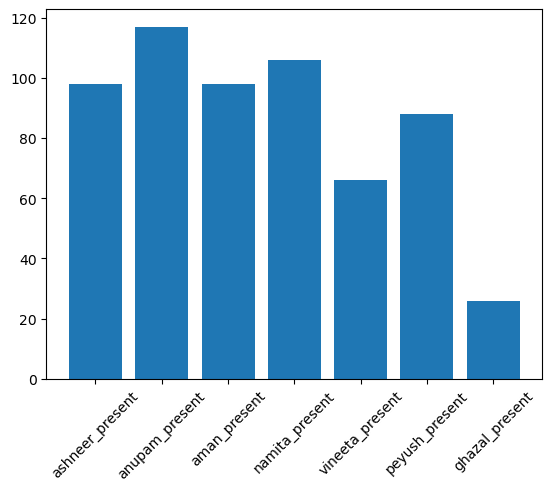

In [136]:
plt.bar(a.index,a.values)
plt.xticks(rotation = 45)
plt.show()

### findings

* Anupum was present in most of piches
* Ghazal was present least number of piches


In [109]:
#Q12. How many brands were present? 
st['brand_name'].count()

117

In [90]:
#Q13. How many times each shark invested the deal?

# ashneer = st['ashneer_deal'].sum()
# print("Ashneer deal:",ashneer)

# anupam = st['anupam_deal'].sum()
# print("Anupum deal:",anupam)

# aman = st['aman_deal'].sum()
# print("Aman deal:",aman)

# namita = st['namita_deal'].sum()
# print("Namita deal:",namita)

# vineeta = st['vineeta_deal'].sum()
# print("Vineeta deal:",vineeta)

# piyush = st['peyush_deal'].sum()
# print("Piyush deal:",piyush)

# ghazal = st['ghazal_deal'].sum()
# print("Ghazal deal:",ghazal)

# total_deal = ashneer+anupam+aman+namita+vineeta+piyush+ghazal
# print(total_deal)

st[['ashneer_deal','anupam_deal','aman_deal','namita_deal','vineeta_deal','peyush_deal','ghazal_deal']].agg(['sum']).T

,sum
ashneer_deal,21
anupam_deal,24
aman_deal,28
namita_deal,22
vineeta_deal,15
peyush_deal,27
ghazal_deal,7


In [49]:
#Q14. Find the most attracted ideas accepted by sharks ?
st[(st['total_sharks_invested']>=5)][['idea']]

,idea
15,Ice-Pops
49,Sneaker Resale
63,Can Cocktails
79,Portable ECG Device


In [139]:
#Q15. Find the total number of amount invested in this show? 
#st[(st['deal']==1)][['deal_amount']].sum()

st['deal_amount'].sum()


3742.00106

In [129]:
#Q16 Above 50% Equity taken by the shark in which brand
st[(st['deal']==1) & (st['deal_equity']>50)][['brand_name',"ask_equity",'deal_equity']]

,brand_name,ask_equity,deal_equity
65,Sid07 Designs,10.0,75.0


# Conclusion: 
* Anupum was present in most of piches
* Ghazal was present least number of piches